# COGS 108 - Final Project

# Names

  - Brianna Lehane
       - Written Descriptions, Data Analysis
  - Alexa Hurtado
       - Data Cleaning, Data Analysis
  - Karam Singh
       - EDA, Data Analysis

# Overview

This study aims to prove and analyze the powerful effect music has on emotion. There are a myriad of musical genres that express different variations of emotions. Some of these genres’ names directly reflect the kind of emotion they look to evoke or express in their music, such as Blues or Soul. Since 1894, music of all different genres have been ranked on the Billboard Top 100 charts based on its popularity; this ranking takes into account sales and how widely listened to the song is (Molanphy, 2013). But what components of a song make this song popular? What emotions are people most widely looking to evoke when listening to music? Using a Spotify data set, we set to investigate the relationship between genre, bpm, danceability, loudness and valence in a song. 

# Background

Music and cognition have a historically important relationship. According to an Oxford University paper titled Music and emotion: theory and research, “It is an ancient, and very pervasive, idea that music expresses emotion” (Scherer and Zentner, 361). Music is powerful for many reasons. Music can affect a person’s productivity, memory, and stress levels (Harvard, 2011). One of music’s most impactful abilities is its effect on human emotion. The sound waves music produces sends vibrations through the ear, eardrum, and all the way through to the hair cells, which, in turn, release chemical neurotransmitters that activate the auditory nerve, sending miniature electric currents to the auditory cortex in the temporal lobe of the brain (Harvard, 2011). With more ways to listen to music today than ever, music listening is becoming more popular. In fact, the music industry gained more than $8 billion dollars in 2017 alone (Christman, 2018).

There are hundreds of different genres of music, some specifically targeting certain emotions, such as Blues or Soul. Of all these emotion-evoking genres, what makes music popular? There are a number of patterns in recent popular songs, such as having a female artist, being up-tempo, and having a well-known artist (Interiano et al, 2018). In fact, the general framework of contemporary popular music has such a common pattern that there has been a term created for these catchy tunes; earworms. 

As we have stated, data has shown that popular contemporary music follows some kind of pattern. But is there a pattern in a specific mood or emotion that can be tracked in popular music? By studying the most popular moods music listeners are seeking, we hope our data analysis can provide insight to musicians and producers looking to understand listener habits as they try to find success in this saturated industry. We also hope our date can inform music listeners about what emotional components of a song makes it so darn catchy!

References:
Harvard, 2011: https://www.health.harvard.edu/staying-healthy/music-and-health
Interiano et al, 2018: https://royalsocietypublishing.org/doi/full/10.1098/rsos.171274
Zentner, Scherer, 2008: https://www.ncbi.nlm.nih.gov/pubmed/18729581
Christman, 2018: https://www.billboard.com/articles/business/8257558/us-music-industry-2017-highest-revenue-in-decade-fueled-paid-subscriptions

# Research Question

Based on our data set, we aim to analyze if the Spotify music values our research team has characterized as ‘fun’ correlate with the popularity of a song. Using the parameters valence, bpm, danceability and how does the perceived ‘fun-ness’ of a song reflect how popular it is between 2008 and 2019? Can ‘fun-ness’ predict a hit song? In other words, can we predict the popularity of a song based on these ‘fun’ features?

# Hypothesis

We hypothesize that an increase across five parameters we have deemed to quantify fun (bpm, loudness, danceability, valence, and energy) will increase the popularity of the song. We will be finding this by also hypothesizing that when running a multiple linear regression model on these parameters we will be able to successfully predict the popularity of that song. 

# Dataset

We used a Spotify API dataset. 

In this set, Spotify created quantifiable parameters to measure descriptive characteristics. These measures include valence, “the musical positiveness conveyed in a track,” danceability, “how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity”, and energy, which “...represents a perceptual measure of intensity and activity” (Spotify for Developers). Seeing as songs can be so many things, our study, using Spotify’s data characteristics, aims to study the relationship between how ‘fun’ (eliciting happiness, joy, excitement) is and the song’s popularity. 

Dataset:
https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year

We begin by importing all the necessary libraries and packages needed to complete our data analysis

In [14]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest


In [2]:
#We begin by importing the file into a pandas Dataframe
Main_FilePath = "Downloads/top-spotify-songs-from-20102019-by-year/top10s.csv"
Main_Music_Dataset = pd.read_csv(Main_FilePath, encoding = "ISO-8859-1")


In [3]:
Main_Music_Dataset.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


# Data Cleaning

For the cleaning process, we start by removing all columns in our dataframe that were not applicable to determining the ‘funness’ of the song. We kept data columns; bpm, loudness, danceability, valence. We also eliminated any initial outliers, including genres with fewer than 40 songs. Since we are using a Spotify dataset, we decided it would only make sense to analyze the popularity of songs that have been released after the application launched in 2008. The timespan of analysis is 2010-2019. The data will be ordered by year of release. To set up our data, we ordered data by year. We separated and created sub-data sets based on the year. 

In [4]:
#Initialize a new Dataframe where we will clean and wrangle data
#Here we are dropping all columns we will not be using in our analysis

Cleaned_Dataset = Main_Music_Dataset.drop(labels = ["live", "dur", "acous", "spch"], axis = 1)

In [5]:
#renaming columns so there's more clarity in what they mean

Cleaned_Dataset.columns = ["Index", "Title", "Artist", "Genre", "Year", "BPM", "Energy", "Dance", "Loudness", "Valence", "Popularity"]

In [6]:
Cleaned_Dataset.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,80,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,64,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,71,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,71,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,43,78


In [7]:
#Sorting by year of songs so we can start to organize this 

Cleaned_Dataset = Cleaned_Dataset.sort_values(by = ["Year"], ascending = False).reset_index(drop = True)

In [8]:
Cleaned_Dataset.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,603,Kills You Slowly,The Chainsmokers,electropop,2019,150,44,70,-9,23,67
1,588,I Don't Care (with Justin Bieber),Ed Sheeran,pop,2019,102,68,80,-5,84,85
2,574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,9,97
3,575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,45,96
4,576,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,75,95


In [9]:
Cleaned_Dataset["Year"].value_counts(sort = False)

2010    51
2011    53
2012    35
2013    71
2014    58
2015    95
2016    80
2017    65
2018    64
2019    31
Name: Year, dtype: int64

In [10]:
#Separating Datasets into different individual years so we can do linear regression on each 
#individually then compare

Dataset_2019 = pd.DataFrame(Cleaned_Dataset[Cleaned_Dataset["Year"] == 2019]).reset_index(drop = True)
Dataset_2018 = pd.DataFrame(Cleaned_Dataset[Cleaned_Dataset["Year"] == 2018]).reset_index(drop = True)
Dataset_2017 = pd.DataFrame(Cleaned_Dataset[Cleaned_Dataset["Year"] == 2017]).reset_index(drop = True)
Dataset_2016 = pd.DataFrame(Cleaned_Dataset[Cleaned_Dataset["Year"] == 2016]).reset_index(drop = True)
Dataset_2015 = pd.DataFrame(Cleaned_Dataset[Cleaned_Dataset["Year"] == 2015]).reset_index(drop = True)
Dataset_2014 = pd.DataFrame(Cleaned_Dataset[Cleaned_Dataset["Year"] == 2014]).reset_index(drop = True)
Dataset_2013 = pd.DataFrame(Cleaned_Dataset[Cleaned_Dataset["Year"] == 2013]).reset_index(drop = True)
Dataset_2012 = pd.DataFrame(Cleaned_Dataset[Cleaned_Dataset["Year"] == 2012]).reset_index(drop = True)
Dataset_2011 = pd.DataFrame(Cleaned_Dataset[Cleaned_Dataset["Year"] == 2011]).reset_index(drop = True)
Dataset_2010 = pd.DataFrame(Cleaned_Dataset[Cleaned_Dataset["Year"] == 2010]).reset_index(drop = True)

In [11]:
#We have now separated into different years and datasets
Dataset_2019.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,603,Kills You Slowly,The Chainsmokers,electropop,2019,150,44,70,-9,23,67
1,588,I Don't Care (with Justin Bieber),Ed Sheeran,pop,2019,102,68,80,-5,84,85
2,574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,9,97
3,575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,45,96
4,576,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,75,95


# Descriptive and Exploratory Data Analysis

Now we want to analyze the data and find the stats for each feature. Here we are going to run some tests on our data. We will start by checking the distributions. We will start by seeing if the data is normally distributed. To run a normality test we will be using the normaltest function to test for normality of the distribution. However before doing this we should pull out the necessary data which we will be running the normality tests on. We will be running the normality tests on each column for 'fun'. 

This means that we will have to pull out the columns for each dataset. Below we are using bpm as an example

In [15]:
# here we are running the normaltest on the bpm column for the 2019 Dataframe 
bpm = Dataset_2019['BPM'].values
s_bpm = stats.normaltest(bpm)[0]
p_bpm = stats.normaltest(bpm)[1]
print(s_bpm)
print(p_bpm)


4.767531702257407
0.09220270124978908


In [16]:
# Here because we see that the p value here is greater than the alpha value (p>0.01)
# We accept the null hypothesis. 
# This means that the values for BPM in this dataset follows a normal distribution. We will then do the same thing for the rest
# of the columns in the dataset

In [17]:
Energy = Dataset_2019['Energy'].values
Energy = Dataset_2019['Energy'].values
s_Energy = stats.normaltest(Energy)[0]
p_Energy = stats.normaltest(Energy)[1]
print(s_Energy)
print(p_Energy)

4.51151802840859
0.10479397342825336


In [18]:
#For the energy values in this Dataframe for 2019 we see that because p>0.01 we accept the null hypothesis. 
#the Energy data for 2019 does follow a normal distribution. 

In [19]:
Dance = Dataset_2019['Dance'].values
s_Dance = stats.normaltest(Dance)[0]
p_Dance = stats.normaltest(Dance)[1]
print(s_Dance)
print(p_Dance)

1.54629753330108
0.4615574411208211


In [20]:
#Here we see that because p>0.01, the Dance values are following a normal distribution.

In [21]:
Loudness = Dataset_2019['Loudness'].values
s_Loudness = stats.normaltest(Loudness)[0]
p_Loudness = stats.normaltest(Loudness)[1]
print(s_Loudness)
print(p_Loudness)

0.6143060361135761
0.7355380416938431


In [22]:
#The loudness follows a normal distribution because the p-value is greater than 0.01 

In [23]:
Valence = Dataset_2019['Valence'].values
s_Valence = stats.normaltest(Valence)[0]
p_Valence = stats.normaltest(Valence)[1]
print(s_Valence)
print(p_Valence)

0.3664824258194452
0.8325673055319263


In [24]:
#The valence follows a normal distribution as well 

In [25]:
Popularity = Dataset_2019['Popularity'].values
s_Popularity = stats.normaltest(Popularity)[0]
p_Popularity = stats.normaltest(Popularity)[1]
print(s_Popularity)
print(p_Popularity)

0.7711395793869441
0.6800630328818376


In [26]:
#Here we realize that because we aren't going to be using t-tests to compare the
#However despite this the normality tests were still a good exercise in statistics however it did not prove to be entirely 
#useful due to the fact that it doesn't make much sense to compare the variables for the different years against each 
# other. 

In [27]:
#In the next few sections we are attempting to visualize the mean values for the variables over the last decade.

In [28]:
Cleaned_Dataset.groupby('Year').mean()

,Index,BPM,Energy,Dance,Loudness,Valence,Popularity
Year,,,,,,,
2010,26.0,122.058824,77.901961,64.529412,-4.901961,57.000000,64.254902
2011,78.0,119.075472,74.886792,63.641509,-5.018868,53.698113,61.867925
2012,122.0,121.085714,75.485714,65.714286,-4.857143,64.171429,67.771429
2013,175.0,121.676056,73.873239,62.042254,-5.140845,53.183099,63.985915
2014,239.5,123.000000,67.775862,62.534483,-5.775862,52.086207,62.706897
2015,316.0,119.768421,70.336842,63.663158,-5.621053,52.526316,64.568421
2016,403.5,114.325000,67.237500,63.325000,-6.712500,45.150000,64.162500
2017,476.0,116.800000,69.169231,65.369231,-5.615385,52.276923,69.015385
2018,540.5,114.593750,65.468750,67.203125,-5.671875,48.765625,72.437500


In [29]:
#Here we acquire a data set that gives all the mean values for all of the years by variable. So we acquire a data set
#that gives all of the mean values for all of the variables that has been grouped by year. 
Cleaned_Dataset = Cleaned_Dataset.groupby('Year').mean()
Cleaned_Dataset

,Index,BPM,Energy,Dance,Loudness,Valence,Popularity
Year,,,,,,,
2010,26.0,122.058824,77.901961,64.529412,-4.901961,57.000000,64.254902
2011,78.0,119.075472,74.886792,63.641509,-5.018868,53.698113,61.867925
2012,122.0,121.085714,75.485714,65.714286,-4.857143,64.171429,67.771429
2013,175.0,121.676056,73.873239,62.042254,-5.140845,53.183099,63.985915
2014,239.5,123.000000,67.775862,62.534483,-5.775862,52.086207,62.706897
2015,316.0,119.768421,70.336842,63.663158,-5.621053,52.526316,64.568421
2016,403.5,114.325000,67.237500,63.325000,-6.712500,45.150000,64.162500
2017,476.0,116.800000,69.169231,65.369231,-5.615385,52.276923,69.015385
2018,540.5,114.593750,65.468750,67.203125,-5.671875,48.765625,72.437500


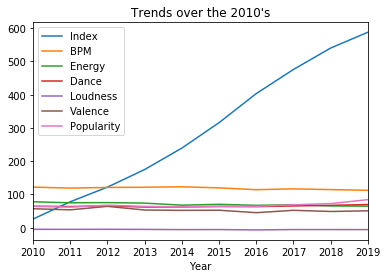

In [30]:
#Here we are plotting all of the mean variables over the last decade. 
ax = Cleaned_Dataset.plot.line()
ax.legend(loc=0)
ax.set_title('Trends over the 2010\'s')
plt.show()

# Finding Linear Relationships Between Features

Now we want to see if there is a linear relationship between variables and popularity before doing linear regression. We will  be looking at relationships between BPM and Popularity as well as Dance and Popularity for each year to analyze linear relationships between these factors in order to predict how well our multiple linear regression will function later on.

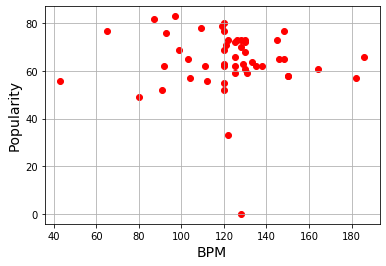

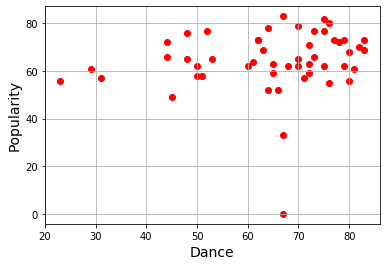

In [31]:
#Let's start with the year 2010
#We will look at the relationships between BPM and Popularity

plt.scatter(Dataset_2010["BPM"], Dataset_2010["Popularity"], color = "red")
plt.xlabel("BPM", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

#Now we can look at relationship between Dance and Popularity

plt.scatter(Dataset_2010["Dance"], Dataset_2010["Popularity"], color = "red")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

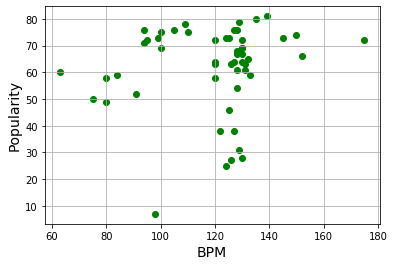

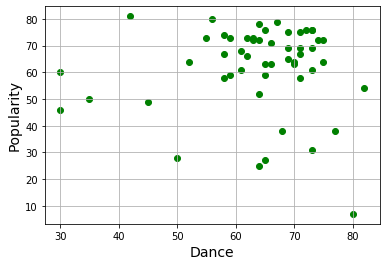

In [32]:
#Let's analyze the same for the rest of the years
#Year 2011

plt.scatter(Dataset_2011["BPM"], Dataset_2011["Popularity"], color = "green")
plt.xlabel("BPM", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2011["Dance"], Dataset_2011["Popularity"], color = "green")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

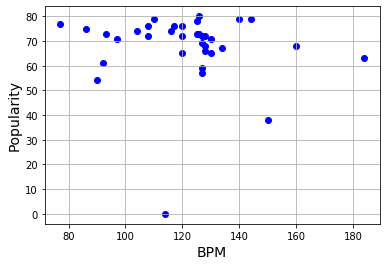

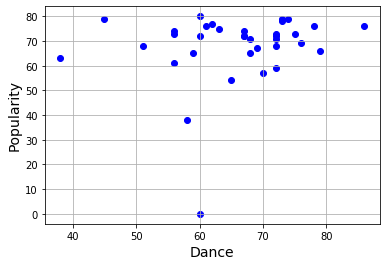

In [33]:
#Year 2012

plt.scatter(Dataset_2012["BPM"], Dataset_2012["Popularity"], color = "blue")
plt.xlabel("BPM", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2012["Dance"], Dataset_2012["Popularity"], color = "blue")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

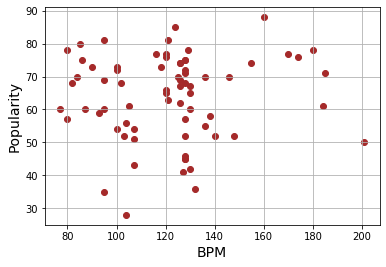

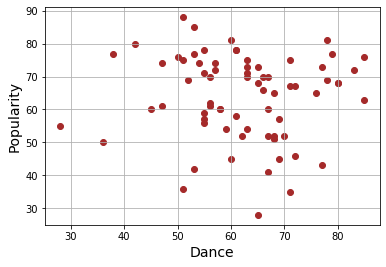

In [34]:
#Year 2013

plt.scatter(Dataset_2013["BPM"], Dataset_2013["Popularity"], color = "brown")
plt.xlabel("BPM", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2013["Dance"], Dataset_2013["Popularity"], color = "brown")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

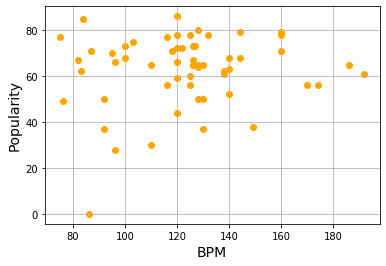

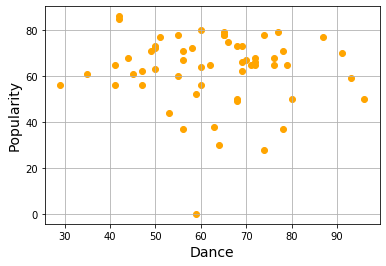

In [35]:
#Year 2014

plt.scatter(Dataset_2014["BPM"], Dataset_2014["Popularity"], color = "orange")
plt.xlabel("BPM", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2014["Dance"], Dataset_2014["Popularity"], color = "orange")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

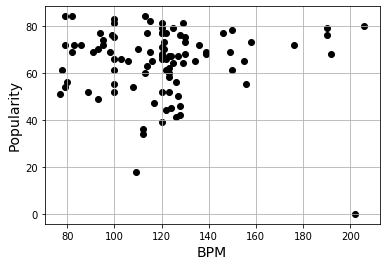

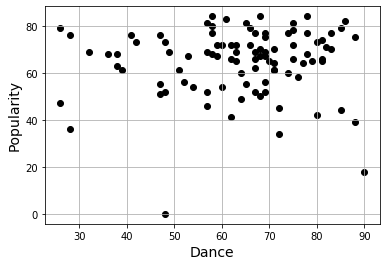

In [36]:
#Year 2015

plt.scatter(Dataset_2015["BPM"], Dataset_2015["Popularity"], color = "black")
plt.xlabel("BPM", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2015["Dance"], Dataset_2015["Popularity"], color = "black")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

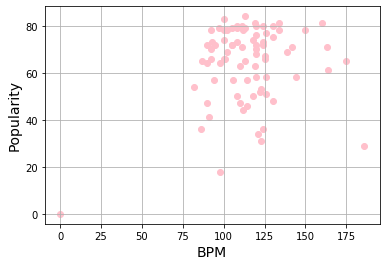

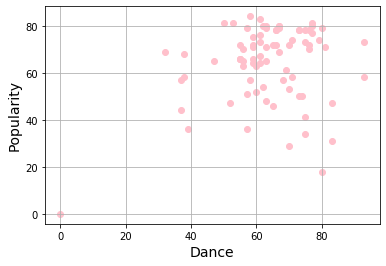

In [37]:
#Year 2016

plt.scatter(Dataset_2016["BPM"], Dataset_2016["Popularity"], color = "pink")
plt.xlabel("BPM", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2016["Dance"], Dataset_2016["Popularity"], color = "pink")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

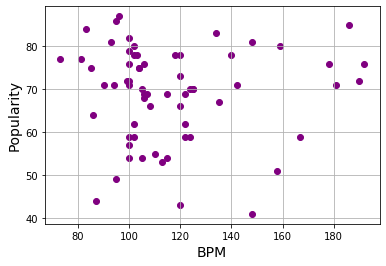

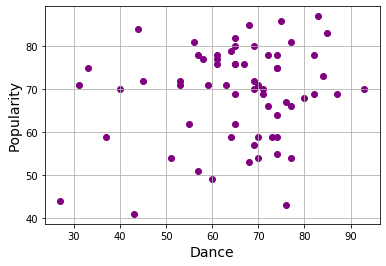

In [38]:
#Year 2017

plt.scatter(Dataset_2017["BPM"], Dataset_2017["Popularity"], color = "purple")
plt.xlabel("BPM", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2017["Dance"], Dataset_2017["Popularity"], color = "purple")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

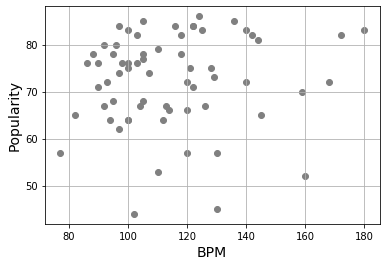

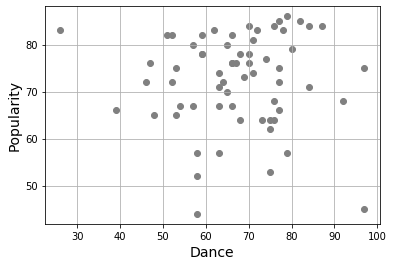

In [39]:
#Year 2018

plt.scatter(Dataset_2018["BPM"], Dataset_2018["Popularity"], color = "grey")
plt.xlabel("BPM", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2018["Dance"], Dataset_2018["Popularity"], color = "grey")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

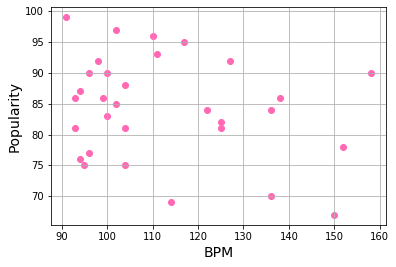

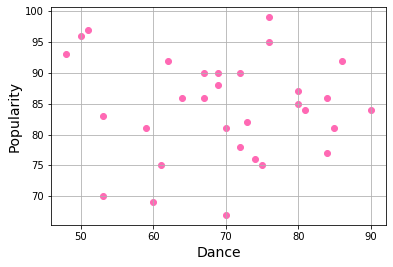

In [40]:
#Year 2019

plt.scatter(Dataset_2019["BPM"], Dataset_2019["Popularity"], color = "hotpink")
plt.xlabel("BPM", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2019["Dance"], Dataset_2019["Popularity"], color = "hotpink")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Popularity", fontsize = 14)
plt.grid(True)
plt.show()

# Multiple Linear Regression to Create Predictor Model

Now we have shown the relationships between at least two variables, testing to see if there even are strong linear 
relationships between features and popularity which would make good models for popularity predictions. As we can see
though, there aren't many strong linear relationships in any of the years that correlate strongly with popularity. 
We will still create predictor models though for each year to see if any year does in fact have a strong predictor for 
popularity based on the features of BPM, Energy, Dance, Valence, and Loudness, which we categorized as "Fun" features. 
We will be using **multiple linear regression** using sci-kit learn and statsmodels for each year's dataset to analyze this. 

In [41]:
#Let's start with 2010

Dataset_2010.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,14,Telephone,Lady Gaga,dance pop,2010,122,83,83,-6,71,73
1,25,All The Right Moves,OneRepublic,dance pop,2010,146,95,53,-4,65,65
2,24,Misery,Maroon 5,pop,2010,103,81,70,-5,73,65
3,23,Take It Off,Kesha,dance pop,2010,125,68,73,-5,74,66
4,22,Whataya Want from Me,Adam Lambert,australian pop,2010,186,68,44,-5,45,66


In [42]:
#Year 2010

#Setting the X variables that will be predictors for Y
X = Dataset_2010[["BPM","Energy", "Dance", "Loudness", "Valence"]]
Y = Dataset_2010["Popularity"]

#using sklearn
regression = linear_model.LinearRegression()
regression.fit(X,Y)

print("Intercept: \n" ,regression.intercept_)
print("Coefficients: \n", regression.coef_)

#Using the features from the first song of the 2010 dataset to see how accurate popularity predictor is
#Predicted popularity should be close to 73 (the actual popularity value of this song) if there's strong linear relationship
New_BPM = 122
New_Energy = 83
New_Dance = 83
New_Loudness = -6
New_Valence = 71

print("Predicted Popularity: \n", regression.predict([[New_BPM, New_Energy, New_Dance, New_Loudness, New_Valence]]))

#used statsmodels here as well 
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
popularity_prediction = model.predict(X)

print(model.summary())


Intercept: 
 48.46488126581923
Coefficients: 
 [ 0.00882285 -0.18146673  0.10974871 -2.52858497  0.16443306]
Predicted Popularity: 
 [70.43493001]
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.326
Date:                Thu, 19 Mar 2020   Prob (F-statistic):              0.270
Time:                        13:31:40   Log-Likelihood:                -200.05
No. Observations:                  51   AIC:                             412.1
Df Residuals:                      45   BIC:                             423.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

C:\Users\alexa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
#Predicted probablity is 70 compared to the 73 we should have gotten
#Somewhat close to expected value

In [44]:
#Year 2011 predictor 

Dataset_2011.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,71,Just Cant Get Enough,The Black Eyed Peas,dance pop,2011,94,63,66,-9,26,71
1,66,Best Thing I Never Had,Beyoncé,dance pop,2011,99,65,55,-4,30,73
2,67,Party Rock Anthem,LMFAO,dance pop,2011,130,74,75,-4,35,72
3,68,We R Who We R,Kesha,dance pop,2011,120,82,74,-5,65,72
4,69,Price Tag,Jessie J,australian pop,2011,175,83,64,-4,68,72


In [45]:
X = Dataset_2011[["BPM","Energy", "Dance", "Loudness", "Valence"]]
Y = Dataset_2011["Popularity"]


regression = linear_model.LinearRegression()
regression.fit(X,Y)

print("Intercept: \n" ,regression.intercept_)
print("Coefficients: \n", regression.coef_)

#Using the features from the first song of the 2011 dataset to see how accurate popularity predictor is
#Predicted popularity should be close to 71 (the actual popularity value of this song) if there's strong linear relationship
New_BPM = 94
New_Energy = 63
New_Dance = 66
New_Loudness = -9
New_Valence = 26

print("Predicted Popularity: \n", regression.predict([[New_BPM, New_Energy, New_Dance, New_Loudness, New_Valence]]))

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
popularity_prediction = model.predict(X)

print(model.summary())

Intercept: 
 56.76860681902299
Coefficients: 
 [ 0.11767085 -0.09398451  0.08569877  0.49351828 -0.09034381]
Predicted Popularity: 
 [60.77415802]
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                    0.3617
Date:                Thu, 19 Mar 2020   Prob (F-statistic):              0.872
Time:                        13:31:40   Log-Likelihood:                -220.84
No. Observations:                  53   AIC:                             453.7
Df Residuals:                      47   BIC:                             465.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

C:\Users\alexa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [46]:
#Predicted popularity is 60 when it should have been 71
#Value is significantly farther from expected

In [47]:
#Year 2012

Dataset_2012.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,120,Glad You Came,The Wanted,boy band,2012,127,85,72,-4,45,72
1,113,Set Fire to the Rain,Adele,british soul,2012,108,68,61,-4,47,76
2,119,Good Time,Owl City,pop,2012,126,87,56,-4,68,73
3,118,One More Night,Maroon 5,pop,2012,93,82,72,-3,62,73
4,117,Starships,Nicki Minaj,dance pop,2012,125,72,75,-2,75,73


In [48]:
X = Dataset_2012[["BPM","Energy", "Dance", "Loudness", "Valence"]]
Y = Dataset_2012["Popularity"]


regression = linear_model.LinearRegression()
regression.fit(X,Y)

print("Intercept: \n" ,regression.intercept_)
print("Coefficients: \n", regression.coef_)

#Using the features from the first song of the 2012 dataset to see how accurate popularity predictor is
#Predicted popularity should be close to 72 (the actual popularity value of this song) if there's strong linear relationship
New_BPM = 127
New_Energy = 85
New_Dance = 72
New_Loudness = -4
New_Valence = 45

print("Predicted Popularity: \n", regression.predict([[New_BPM, New_Energy, New_Dance, New_Loudness, New_Valence]]))

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
popularity_prediction = model.predict(X)

print(model.summary())

Intercept: 
 83.56260634882551
Coefficients: 
 [ 0.0663748  -0.45293145  0.41721186  1.08585645 -0.18358612]
Predicted Popularity: 
 [70.92748569]
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.472
Date:                Thu, 19 Mar 2020   Prob (F-statistic):              0.229
Time:                        13:31:41   Log-Likelihood:                -138.86
No. Observations:                  35   AIC:                             289.7
Df Residuals:                      29   BIC:                             299.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

C:\Users\alexa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [49]:
#Predicted popularity is 71 and actual is 72 
#Relatively good predictor for this year

In [50]:
#Year 2013

Dataset_2013.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,158,Everybody Talks,Neon Trees,indie pop,2013,155,92,47,-4,73,74
1,164,Work Bitch,Britney Spears,dance pop,2013,128,82,63,-7,85,71
2,159,"Hold On, We're Going Home",Drake,canadian hip hop,2013,100,41,77,-7,29,73
3,160,Best Song Ever,One Direction,boy band,2013,118,88,65,-3,49,73
4,161,Kiss You,One Direction,boy band,2013,90,93,63,-3,91,73


In [51]:
X = Dataset_2013[["BPM","Energy", "Dance", "Loudness", "Valence"]]
Y = Dataset_2013["Popularity"]


regression = linear_model.LinearRegression()
regression.fit(X,Y)

print("Intercept: \n" ,regression.intercept_)
print("Coefficients: \n", regression.coef_)

#Using the features from the first song of the 2013 dataset to see how accurate popularity predictor is
#Predicted popularity should be close to 74 (the actual popularity value of this song) if there's strong linear relationship
New_BPM = 155
New_Energy = 92
New_Dance = 47
New_Loudness = -4
New_Valence = 73

print("Predicted Popularity: \n", regression.predict([[New_BPM, New_Energy, New_Dance, New_Loudness, New_Valence]]))

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
popularity_prediction = model.predict(X)

print(model.summary())

Intercept: 
 66.28760606975807
Coefficients: 
 [ 0.02382258 -0.05000192 -0.07094011  0.08474761  0.06262205]
Predicted Popularity: 
 [66.27816298]
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                    0.1479
Date:                Thu, 19 Mar 2020   Prob (F-statistic):              0.980
Time:                        13:31:41   Log-Likelihood:                -281.21
No. Observations:                  71   AIC:                             574.4
Df Residuals:                      65   BIC:                             588.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

C:\Users\alexa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [52]:
#Predicted popularity is 66 when should have been 74
#Relatively poor predictor for what value should have been

In [53]:
#Year 2014

Dataset_2014.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,230,She Looks So Perfect,5 Seconds of Summer,boy band,2014,160,95,49,-4,44,71
1,225,Love Me Again,John Newman,pop,2014,126,89,50,-5,21,73
2,226,Latch,Disclosure,house,2014,122,73,50,-5,52,72
3,227,Adore You,Miley Cyrus,dance pop,2014,120,66,58,-5,20,72
4,228,Love Never Felt So Good,Michael Jackson,pop,2014,118,72,78,-6,71,71


In [54]:
X = Dataset_2014[["BPM","Energy", "Dance", "Loudness", "Valence"]]
Y = Dataset_2014["Popularity"]


regression = linear_model.LinearRegression()
regression.fit(X,Y)

print("Intercept: \n" ,regression.intercept_)
print("Coefficients: \n", regression.coef_)

#Using the features from the first song of the 2014 dataset to see how accurate popularity predictor is
#Predicted popularity should be close to 71 (the actual popularity value of this song) if there's strong linear relationship
New_BPM = 160
New_Energy = 95
New_Dance = 49
New_Loudness = -4
New_Valence = 44

print("Predicted Popularity: \n", regression.predict([[New_BPM, New_Energy, New_Dance, New_Loudness, New_Valence]]))

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
popularity_prediction = model.predict(X)

print(model.summary())

Intercept: 
 87.51192043527968
Coefficients: 
 [ 0.08395913 -0.22530767 -0.14470518  2.92697087  0.11698428]
Predicted Popularity: 
 [65.89002472]
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.040
Date:                Thu, 19 Mar 2020   Prob (F-statistic):              0.404
Time:                        13:31:42   Log-Likelihood:                -238.17
No. Observations:                  58   AIC:                             488.3
Df Residuals:                      52   BIC:                             500.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

C:\Users\alexa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
#Predicted popularity is 65 when it should be 71
#Not the best predictor

In [56]:
#Year 2015

Dataset_2015.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,321,I Really Like You,Carly Rae Jepsen,canadian pop,2015,122,81,62,-5,60,66
1,322,BO$$,Fifth Harmony,dance pop,2015,103,87,81,-5,74,66
2,323,Sugar,Maroon 5,pop,2015,120,79,75,-7,88,66
3,324,Focus,Ariana Grande,dance pop,2015,100,88,67,-6,79,66
4,325,All About That Bass,Meghan Trainor,dance pop,2015,134,88,81,-4,96,65


In [57]:

X = Dataset_2015[["BPM","Energy", "Dance", "Loudness", "Valence"]]
Y = Dataset_2015["Popularity"]


regression = linear_model.LinearRegression()
regression.fit(X,Y)

print("Intercept: \n" ,regression.intercept_)
print("Coefficients: \n", regression.coef_)

#Using the features from the first song of the 2015 dataset to see how accurate popularity predictor is
#Predicted popularity should be close to 66 (the actual popularity value of this song) if there's strong linear relationship
New_BPM = 122
New_Energy = 81
New_Dance = 62
New_Loudness = -5
New_Valence = 60

print("Predicted Popularity: \n", regression.predict([[New_BPM, New_Energy, New_Dance, New_Loudness, New_Valence]]))

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
popularity_prediction = model.predict(X)

print(model.summary())

Intercept: 
 68.43398160100823
Coefficients: 
 [-0.02942686 -0.04576655 -0.02571096 -0.20286017  0.06424352]
Predicted Popularity: 
 [64.41164703]
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                    0.2287
Date:                Thu, 19 Mar 2020   Prob (F-statistic):              0.949
Time:                        13:31:43   Log-Likelihood:                -386.76
No. Observations:                  95   AIC:                             785.5
Df Residuals:                      89   BIC:                             800.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

C:\Users\alexa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [58]:
#Predicted popularity is 64 and actual is 66, not bad predictor for this year

In [59]:
#Year 2016

Dataset_2016.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,386,Confident,Demi Lovato,dance pop,2016,130,75,59,-6,34,75
1,393,Close,Nick Jonas,dance pop,2016,124,62,65,-5,40,72
2,385,Electric Love,BØRNS,electropop,2016,120,80,61,-8,52,76
3,387,Too Good,Drake,canadian hip hop,2016,118,65,79,-8,39,74
4,388,Roses,The Chainsmokers,electropop,2016,100,80,71,-7,34,74


In [60]:
X = Dataset_2016[["BPM","Energy", "Dance", "Loudness", "Valence"]]
Y = Dataset_2016["Popularity"]


regression = linear_model.LinearRegression()
regression.fit(X,Y)

print("Intercept: \n" ,regression.intercept_)
print("Coefficients: \n", regression.coef_)

#Using the features from the first song of the 2016 dataset to see how accurate popularity predictor is
#Predicted popularity should be close to 75 (the actual popularity value of this song) if there's strong linear relationship
New_BPM = 130
New_Energy = 75
New_Dance = 59
New_Loudness = -6
New_Valence = 34

print("Predicted Popularity: \n", regression.predict([[New_BPM, New_Energy, New_Dance, New_Loudness, New_Valence]]))

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
popularity_prediction = model.predict(X)

print(model.summary())

Intercept: 
 78.05272532332924
Coefficients: 
 [-0.01780832 -0.0583745   0.07444689  1.30649132 -0.08579978]
Predicted Popularity: 
 [64.99578232]
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     4.231
Date:                Thu, 19 Mar 2020   Prob (F-statistic):            0.00194
Time:                        13:31:43   Log-Likelihood:                -325.94
No. Observations:                  80   AIC:                             663.9
Df Residuals:                      74   BIC:                             678.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

C:\Users\alexa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [61]:
#Predicted popularity is 65 when it should be 75
#Features in this year were not the best predictors for popularity of songs

In [62]:
#Year 2017

Dataset_2017.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,468,Slide (feat. Frank Ocean & Migos),Calvin Harris,dance pop,2017,104,80,74,-3,51,75
1,462,Despacito - Remix,Luis Fonsi,latin,2017,178,82,65,-4,82,76
2,463,The Greatest,Sia,australian dance,2017,192,73,67,-6,73,76
3,464,There for You,Martin Garrix,big room,2017,106,64,61,-8,13,76
4,465,Paris,The Chainsmokers,electropop,2017,100,64,65,-7,25,76


In [63]:
X = Dataset_2017[["BPM","Energy", "Dance", "Loudness", "Valence"]]
Y = Dataset_2017["Popularity"]


regression = linear_model.LinearRegression()
regression.fit(X,Y)

print("Intercept: \n" ,regression.intercept_)
print("Coefficients: \n", regression.coef_)

#Using the features from the first song of the 2017 dataset to see how accurate popularity predictor is
#Predicted popularity should be close to 75 (the actual popularity value of this song) if there's strong linear relationship
New_BPM = 104
New_Energy = 80
New_Dance = 74
New_Loudness = -3
New_Valence = 51

print("Predicted Popularity: \n", regression.predict([[New_BPM, New_Energy, New_Dance, New_Loudness, New_Valence]]))

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
popularity_prediction = model.predict(X)

print(model.summary())

Intercept: 
 76.17779403033025
Coefficients: 
 [ 3.38167509e-02 -1.93245644e-01  1.42245550e-01  1.24964006e+00
 -5.13152776e-04]
Predicted Popularity: 
 [70.98616439]
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.088
Date:                Thu, 19 Mar 2020   Prob (F-statistic):              0.377
Time:                        13:31:48   Log-Likelihood:                -244.62
No. Observations:                  65   AIC:                             501.2
Df Residuals:                      59   BIC:                             514.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

C:\Users\alexa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
#Predicted popularity is 71 when it should be 75
#Not the best but not the worst for this year

In [65]:
#Year 2018

Dataset_2018.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,531,Him & I (with Halsey),G-Eazy,hip hop,2018,88,73,59,-6,19,78
1,526,These Days,Rudimental,dance pop,2018,92,81,65,-4,55,80
2,527,What Lovers Do (feat. SZA),Maroon 5,pop,2018,110,60,80,-5,42,79
3,528,Finesse - Remix; feat. Cardi B,Bruno Mars,pop,2018,105,86,70,-5,93,78
4,529,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,pop,2018,95,30,59,-7,36,78


In [66]:
X = Dataset_2018[["BPM","Energy", "Dance", "Loudness", "Valence"]]
Y = Dataset_2018["Popularity"]


regression = linear_model.LinearRegression()
regression.fit(X,Y)

print("Intercept: \n" ,regression.intercept_)
print("Coefficients: \n", regression.coef_)

#Using the features from the first song of the 2018 dataset to see how accurate popularity predictor is
#Predicted popularity should be close to 78 (the actual popularity value of this song) if there's strong linear relationship
New_BPM = 88
New_Energy = 73
New_Dance = 59
New_Loudness = -6
New_Valence = 19

print("Predicted Popularity: \n", regression.predict([[New_BPM, New_Energy, New_Dance, New_Loudness, New_Valence]]))

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
popularity_prediction = model.predict(X)

print(model.summary())

Intercept: 
 92.43770744292375
Coefficients: 
 [ 0.04185673 -0.19015447 -0.03406762  2.3948199   0.07228491]
Predicted Popularity: 
 [67.2343272]
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.409
Date:                Thu, 19 Mar 2020   Prob (F-statistic):              0.234
Time:                        13:31:49   Log-Likelihood:                -233.17
No. Observations:                  64   AIC:                             478.3
Df Residuals:                      58   BIC:                             491.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.0

C:\Users\alexa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [67]:
#Predicted popularity is 67 when it should be 78
#Features were not the best predictors for this year

In [68]:
#Year 2019
Dataset_2019.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,603,Kills You Slowly,The Chainsmokers,electropop,2019,150,44,70,-9,23,67
1,588,I Don't Care (with Justin Bieber),Ed Sheeran,pop,2019,102,68,80,-5,84,85
2,574,Lose You To Love Me,Selena Gomez,dance pop,2019,102,34,51,-9,9,97
3,575,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,45,96
4,576,Señorita,Shawn Mendes,canadian pop,2019,117,54,76,-6,75,95


In [69]:


X = Dataset_2019[["BPM","Energy", "Dance", "Loudness", "Valence"]]
Y = Dataset_2019["Popularity"]


regression = linear_model.LinearRegression()
regression.fit(X,Y)

print("Intercept: \n" ,regression.intercept_)
print("Coefficients: \n", regression.coef_)

#Using the features from the first song of the 2019 dataset to see how accurate popularity predictor is
#Predicted popularity should be close to 67 (the actual popularity value of this song) if there's strong linear relationship
New_BPM = 150
New_Energy = 44
New_Dance = 70
New_Loudness = -9
New_Valence = 23

print("Predicted Popularity: \n", regression.predict([[New_BPM, New_Energy, New_Dance, New_Loudness, New_Valence]]))

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
popularity_prediction = model.predict(X)

print(model.summary())

Intercept: 
 145.6732046826455
Coefficients: 
 [-0.11181934 -0.45153094 -0.07030163  3.11901555  0.06690861]
Predicted Popularity: 
 [77.57958672]
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     4.569
Date:                Thu, 19 Mar 2020   Prob (F-statistic):            0.00427
Time:                        13:31:50   Log-Likelihood:                -98.995
No. Observations:                  31   AIC:                             210.0
Df Residuals:                      25   BIC:                             218.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

C:\Users\alexa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [70]:
#The predicted popularity was 77 when the actual was 67
#Features for this year were not the best predicors for popularity

# Results for Multiple Linear Regression on Predicting Popularity

Features in all years were not as good predictors as we would have expected for popularity.
Maybe this is because we did not see much linearity when doing scatter plots to test for 
correlation between features and popularity.

However the years that did show strongest relationships
for popularity predictions from music features were **2010**, **2012**, and **2015**. In general though, the scatter plots showed
there was not a strong linear relationship between popularity and other features to begin with. Our multiple linear regression
and prediction models further emphasize this fault. 


# Finding Linearity between factors and Valence

While we were playing around with the data, however, we noticed there was more of a linear relationship between other 
features and valence, meaning with these datasets we are perhaps better able to predict the valence of songs. Scatter plots are 
shown below to demonstrate these linear relationships 

In [71]:
Dataset_2010.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,14,Telephone,Lady Gaga,dance pop,2010,122,83,83,-6,71,73
1,25,All The Right Moves,OneRepublic,dance pop,2010,146,95,53,-4,65,65
2,24,Misery,Maroon 5,pop,2010,103,81,70,-5,73,65
3,23,Take It Off,Kesha,dance pop,2010,125,68,73,-5,74,66
4,22,Whataya Want from Me,Adam Lambert,australian pop,2010,186,68,44,-5,45,66


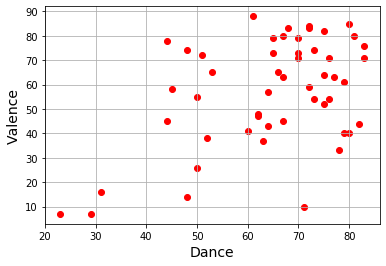

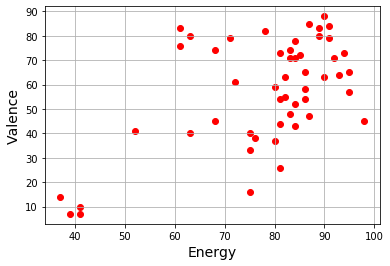

In [72]:
#Testing BPM versus Valence for 2010

plt.scatter(Dataset_2010["Dance"], Dataset_2010["Valence"], color = "red")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2010["Energy"], Dataset_2010["Valence"], color = "red")
plt.xlabel("Energy", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()
#Testing Energy Versus Valence 

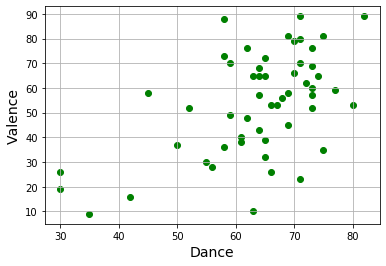

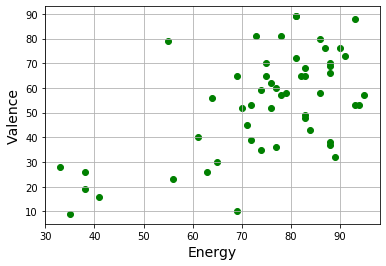

In [73]:
#Year 2011


plt.scatter(Dataset_2011["Dance"], Dataset_2011["Valence"], color = "green")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2011["Energy"], Dataset_2011["Valence"], color = "green")
plt.xlabel("Energy", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

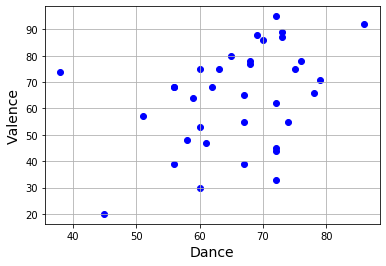

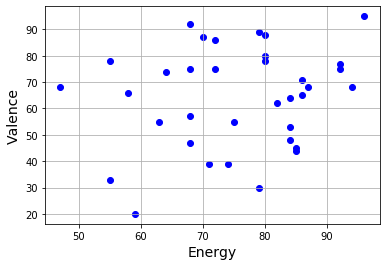

In [74]:
#Year 2012

plt.scatter(Dataset_2012["Dance"], Dataset_2012["Valence"], color = "blue")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2012["Energy"], Dataset_2012["Valence"], color = "blue")
plt.xlabel("Energy", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

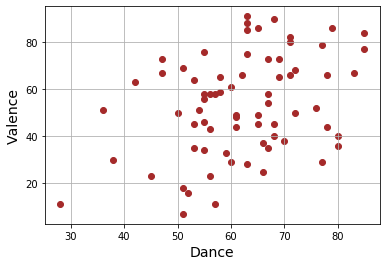

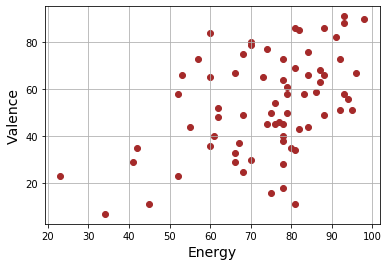

In [75]:
#Year 2013

plt.scatter(Dataset_2013["Dance"], Dataset_2013["Valence"], color = "brown")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2013["Energy"], Dataset_2013["Valence"], color = "brown")
plt.xlabel("Energy", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

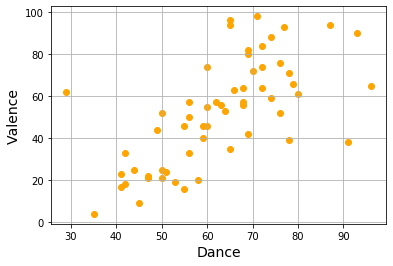

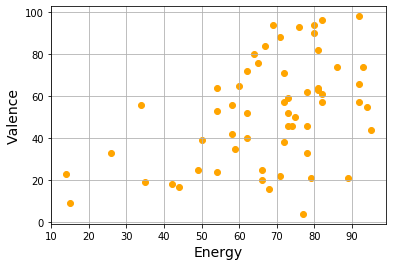

In [76]:
#Year 2014

plt.scatter(Dataset_2014["Dance"], Dataset_2014["Valence"], color = "orange")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2014["Energy"], Dataset_2014["Valence"], color = "orange")
plt.xlabel("Energy", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

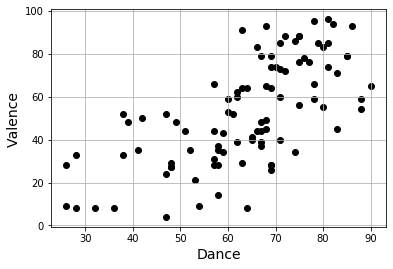

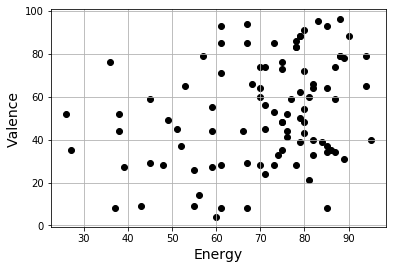

In [77]:
#Year 2015

plt.scatter(Dataset_2015["Dance"], Dataset_2015["Valence"], color = "black")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2015["Energy"], Dataset_2015["Valence"], color = "black")
plt.xlabel("Energy", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

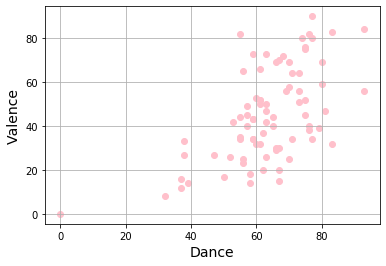

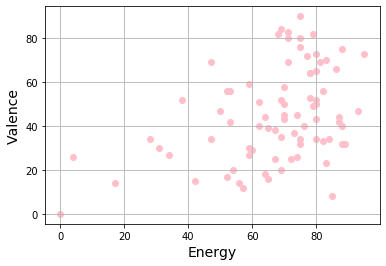

In [78]:
#Year 2016

plt.scatter(Dataset_2016["Dance"], Dataset_2016["Valence"], color = "pink")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2016["Energy"], Dataset_2016["Valence"], color = "pink")
plt.xlabel("Energy", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

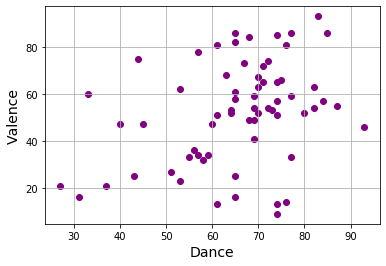

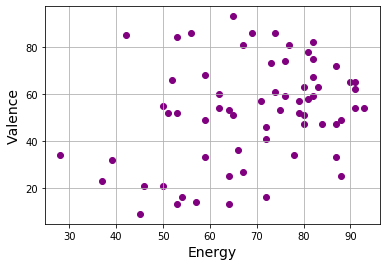

In [79]:
#Year 2017

plt.scatter(Dataset_2017["Dance"], Dataset_2017["Valence"], color = "purple")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2017["Energy"], Dataset_2017["Valence"], color = "purple")
plt.xlabel("Energy", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

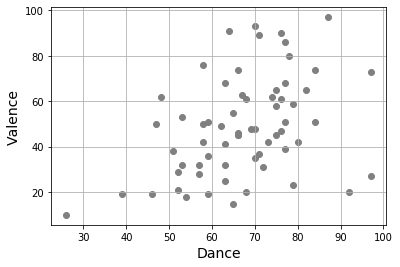

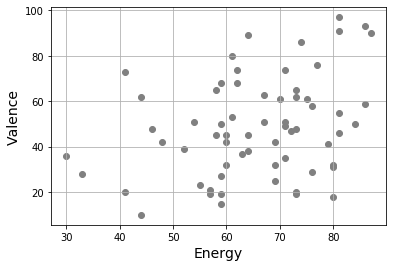

In [80]:
#Year 2018

plt.scatter(Dataset_2018["Dance"], Dataset_2018["Valence"], color = "grey")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2018["Energy"], Dataset_2018["Valence"], color = "grey")
plt.xlabel("Energy", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

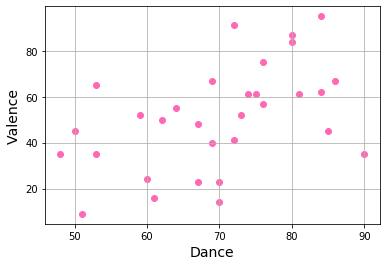

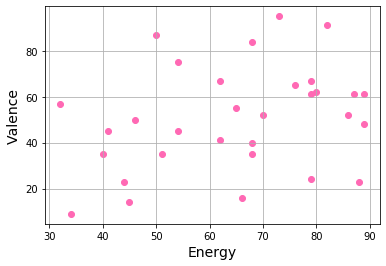

In [81]:
#Year 2019

plt.scatter(Dataset_2019["Dance"], Dataset_2019["Valence"], color = "hotpink")
plt.xlabel("Dance", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

plt.scatter(Dataset_2019["Energy"], Dataset_2019["Valence"], color = "hotpink")
plt.xlabel("Energy", fontsize = 14)
plt.ylabel("Valence", fontsize = 14)
plt.grid(True)
plt.show()

# Multiple Linear Regression to predict Valence from Features

The years that show the most linearity between Dance and Energy and Valence are 2010, 2014, and 2016. So we will be using multiple linear regression on those years to see if we can use Dance and Energy values of a song to predict the Valence of that song. 

(The valence number of a song is representative of the positive tone a song carries.) 

In [82]:
#Year 2010 Analysis

Dataset_2010.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,14,Telephone,Lady Gaga,dance pop,2010,122,83,83,-6,71,73
1,25,All The Right Moves,OneRepublic,dance pop,2010,146,95,53,-4,65,65
2,24,Misery,Maroon 5,pop,2010,103,81,70,-5,73,65
3,23,Take It Off,Kesha,dance pop,2010,125,68,73,-5,74,66
4,22,Whataya Want from Me,Adam Lambert,australian pop,2010,186,68,44,-5,45,66


In [83]:
X = Dataset_2010[["Energy", "Dance"]]
Y = Dataset_2010["Valence"]


regression = linear_model.LinearRegression()
regression.fit(X,Y)

print("Intercept: \n" ,regression.intercept_)
print("Coefficients: \n", regression.coef_)

#Using the features from the first song of the 2010 dataset to see how accurate valence predictor is
#Predicted valence should be close to 71 (the actual valence value of this song) if there's strong linear relationship

New_Energy = 83
New_Dance = 83


print("Predicted Valence: \n", regression.predict([[ New_Energy, New_Dance]]))

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
valence_prediction = model.predict(X)

print(model.summary())

Intercept: 
 -32.03674355658168
Coefficients: 
 [0.70576115 0.52776812]
Predicted Valence: 
 [70.34618559]
                            OLS Regression Results                            
Dep. Variable:                Valence   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     18.68
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.00e-06
Time:                        13:32:19   Log-Likelihood:                -214.83
No. Observations:                  51   AIC:                             435.7
Df Residuals:                      48   BIC:                             441.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

C:\Users\alexa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [84]:
#Predictor worked very well, the predicted valence was 70.3 and actual is 71, very close values.

In [85]:
#Year 2014 Analysis

Dataset_2014.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,230,She Looks So Perfect,5 Seconds of Summer,boy band,2014,160,95,49,-4,44,71
1,225,Love Me Again,John Newman,pop,2014,126,89,50,-5,21,73
2,226,Latch,Disclosure,house,2014,122,73,50,-5,52,72
3,227,Adore You,Miley Cyrus,dance pop,2014,120,66,58,-5,20,72
4,228,Love Never Felt So Good,Michael Jackson,pop,2014,118,72,78,-6,71,71


In [86]:
X = Dataset_2014[["Energy", "Dance"]]
Y = Dataset_2014["Valence"]


regression = linear_model.LinearRegression()
regression.fit(X,Y)

print("Intercept: \n" ,regression.intercept_)
print("Coefficients: \n", regression.coef_)

#Using the features from the first song of the 2014 dataset to see how accurate valence predictor is
#Predicted valence should be close to 44 (the actual valence value of this song) if there's strong linear relationship

New_Energy = 95
New_Dance = 49


print("Predicted Valence: \n", regression.predict([[New_Energy, New_Dance]]))

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
valence_prediction = model.predict(X)

print(model.summary())

Intercept: 
 -38.404811643994684
Coefficients: 
 [0.40831148 1.00452347]
Predicted Valence: 
 [49.60642944]
                            OLS Regression Results                            
Dep. Variable:                Valence   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     29.54
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.93e-09
Time:                        13:32:19   Log-Likelihood:                -247.45
No. Observations:                  58   AIC:                             500.9
Df Residuals:                      55   BIC:                             507.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

C:\Users\alexa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [87]:
#Predicted was 49 and actual is 44, only 5 difference. 

In [88]:
#Year 2016 Analysis

Dataset_2016.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Dance,Loudness,Valence,Popularity
0,386,Confident,Demi Lovato,dance pop,2016,130,75,59,-6,34,75
1,393,Close,Nick Jonas,dance pop,2016,124,62,65,-5,40,72
2,385,Electric Love,BØRNS,electropop,2016,120,80,61,-8,52,76
3,387,Too Good,Drake,canadian hip hop,2016,118,65,79,-8,39,74
4,388,Roses,The Chainsmokers,electropop,2016,100,80,71,-7,34,74


In [89]:
X = Dataset_2016[["Energy", "Dance"]]
Y = Dataset_2016["Valence"]


regression = linear_model.LinearRegression()
regression.fit(X,Y)

print("Intercept: \n" ,regression.intercept_)
print("Coefficients: \n", regression.coef_)

#Using the features from the first song of the 2016 dataset to see how accurate valence predictor is
#Predicted valence should be close to 34 (the actual valence value of this song) if there's strong linear relationship

New_Energy = 75
New_Dance = 59


print("Predicted Valence: \n", regression.predict([[New_Energy, New_Dance]]))

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
valence_prediction = model.predict(X)

print(model.summary())

Intercept: 
 -22.84004831972633
Coefficients: 
 [0.28126634 0.77502413]
Predicted Valence: 
 [43.98135056]
                            OLS Regression Results                            
Dep. Variable:                Valence   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     26.34
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.92e-09
Time:                        13:32:22   Log-Likelihood:                -336.11
No. Observations:                  80   AIC:                             678.2
Df Residuals:                      77   BIC:                             685.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

C:\Users\alexa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [90]:
#Predicted was 43 but actual was 34, meaning this year maybe did not have as good a linear
#relationship between dance and energy and valence

# Ethical Considerations / Limitations

Based on Spotify’s policies, we complied that we use the services for our own internal, personal, non-commercial use, and not on behalf of or for the benefit of any third party therefore we have the permission to use the data. Since what we are doing is a non-profit school project that is not for the benefit of any third party, we believe that we have permission to use the data. We obtained this dataset from  Kaggle user Leonardo Henrique who publicly put out this data and collected it from Spotify in order for others to analyze.  (Spotify terms of use: https://developer.spotify.com/terms/). Using this public data for the intended analysis does not pose any breach of data privacy or ethical concerns. 
 
We have given explicit credit to Spotify for publicly supplying this data set and all of the quantifications they created within the dataset (valence, danceability, etc).
 
Since this is not a surveyed dataset, we did not have to factor individual consent into our ethical compliance concerns. 
 
The characteristics we used to measure how fun a song is are not organically quantifiable; they were created by the Spotify data team. We understand that this could provide a level of bias. Also, our team decided which of Spotify’s data characteristics we believed could fall under the category of ‘fun’. Our perception of fun is key to how the data is shaped.
 
Our dataset was taken from Spotify but we extracted this dataset specifically from Leonardo Henrique, who collected this data and put it on Kaggle for public use. He extracted the numbers and data in order for others to publicly use. 
 
Since Spotify was released in 2008, we were only able to study a short time frame of popular music. Spotify has also grown in popularity over the time frame we analyzed, so the relationship between the popularity of the app and the popularity of the music may have contributed to our data.
 


# Results/ Discussion

In the end, our hypothesis was disproved; there was very little relationship between popularity and the components of the music. We were trying to predict popularity based on these factors of ‘fun-ness’ such as BPM, Energy, Dance, Loudness and Valence but we saw that there was no strong linear relationship between the two sufficient enough to create a strong predictor model.

In regards to how the years differed in their features and how they predicted popularity, we did find that there were certain years where these ‘fun-ness’ features did more accurately predict the popularity of the song. Regardless there was still no strong linear relationships in any of the years that would provide consistent enough prediction results.

However in our EDA portion of the assignment we found linear relationships between Dance and Energy and Valence. Meaning when we ran the same multiple linear regression on these two parameters, Dance and Energy,  trying to predict valence, we came out with more successful results. The predictions were far more accurate. This led us to believe that maybe had we focused on less parameters as a means of predicting popularity this would have resulted in a higher performing predictor. 

If we were to replicate this study, we might experiment with different music streaming services to analyze whether the source of the music has a correlation with the music’s popularity. Spotify was launched in 2008, which limits the number of years and music listeners 

If we had access to a music streaming service with a longer history, we would also consider modifying the study to analyze the popularity of music over different timeframes. 

If we were to replicate this study, we might also narrow down how many parameters we used to measure fun. It is possible that some of our parameters might have correlated toward fun while others were confounding variables, but since we tested them as a single unit it is difficult to know.

